MP1 Part 2 - Austin Perales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
#(1) Creating the column names
column_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']

# Loading the dataset
data = pd.read_csv('Concrete_Data.csv', names=column_names, header=None)

In [3]:
#(2) Set 'Concrete Compressive Strength' as the target variable
X = data.drop('Concrete Compressive Strength', axis=1)
y = data['Concrete Compressive Strength']

# Removing first row of strings and reseting the index
X = X.iloc[1:].reset_index(drop=True)
y = y.iloc[1:].reset_index(drop=True)

print(f"Shape of X: {X.shape} and y: {y.shape}\n")
print(f"X:\n{X[:10]}\n\ny\n{y[:10]}")

Shape of X: (1030, 8) and y: (1030,)

X:
  Cement Blast Furnace Slag Fly Ash Water Superplasticizer Coarse Aggregate  \
0    540                  0       0   162              2.5             1040   
1    540                  0       0   162              2.5             1055   
2  332.5              142.5       0   228                0              932   
3  332.5              142.5       0   228                0              932   
4  198.6              132.4       0   192                0            978.4   
5    266                114       0   228                0              932   
6    380                 95       0   228                0              932   
7    380                 95       0   228                0              932   
8    266                114       0   228                0              932   
9    475                  0       0   228                0              932   

  Fine Aggregate  Age  
0            676   28  
1            676   28  
2            594 

In [4]:
#(3) Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#(4) Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#(5) Linear Regression model on the scaled data
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Compute train and test RMSE
y_train_pred = regressor.predict(X_train_scaled)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
y_test_pred = regressor.predict(X_test_scaled)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Train RMSE (without PCA):", train_rmse)
print("Test RMSE (without PCA):", test_rmse)

Train RMSE (without PCA): 10.518787334819802
Test RMSE (without PCA): 9.796475901624358


In [7]:
#(6) PCA with 7 principal components
pca_all = PCA(n_components=7,random_state=42)

# Let us fit transform the original scaled data
principalComponents_all = pca_all.fit_transform(X_train_scaled)

# The explained variance is accessible as a method from the PCA object we created
print(f"Explained variance ratios:\n{pca_all.explained_variance_ratio_}")

Explained variance ratios:
[0.28019088 0.17909394 0.16827629 0.12802619 0.11811602 0.09938551
 0.02303032]


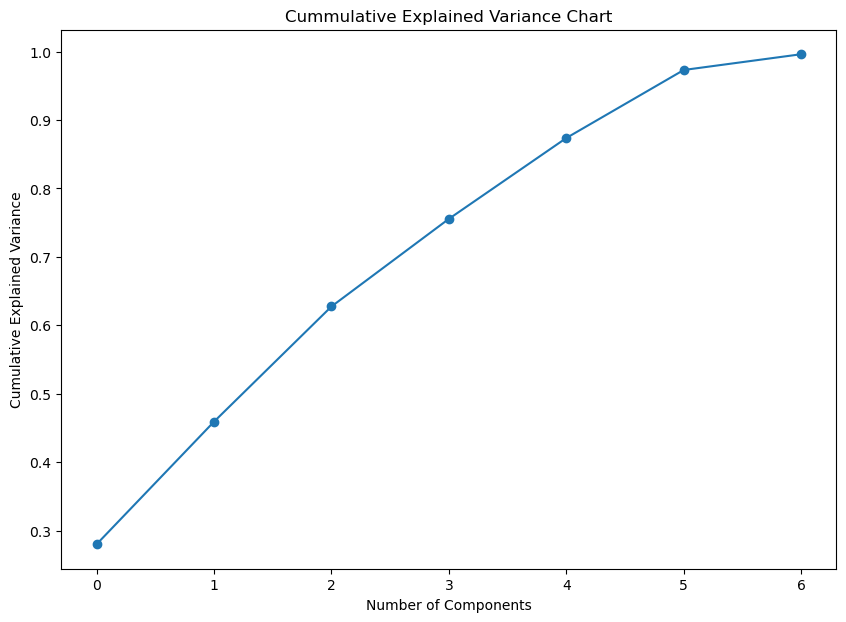

In [8]:
#(7) Plotting the cummulative explained variance chart
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.title('Cummulative Explained Variance Chart')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [9]:
#(8) Check how many components are there upto the point where explained variance becomes > 0.9
n_components = np.where(np.cumsum(pca_all.explained_variance_ratio_) > 0.9)[0][0]+1
print(f"Number of Components which explain the variance in the data up to 90%: {np.where(np.cumsum(pca_all.explained_variance_ratio_) > 0.9)[0][0]+1}")

Number of Components which explain the variance in the data up to 90%: 6


In [10]:
#(9) Instantiate new PCA object with n_components
pca_final = PCA(n_components=n_components)

In [11]:
#(10) New PCA fit transform
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

In [12]:
#(11) New Linear Regression model on the reduced dataset
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [13]:
#(11) New train and test RMSE with PCA
y_train_pred_pca = regressor_pca.predict(X_train_pca)
train_rmse_pca = mean_squared_error(y_train, y_train_pred_pca, squared=False)
y_test_pred_pca = regressor_pca.predict(X_test_pca)
test_rmse_pca = mean_squared_error(y_test, y_test_pred_pca, squared=False)
print("Train RMSE (with PCA):", train_rmse_pca)
print("Test RMSE (with PCA):",test_rmse_pca)

Train RMSE (with PCA): 11.168046148274074
Test RMSE (with PCA): 10.551501117180655


In [14]:
#(12) Compare the RMSE values
percentage_train_difference = abs(train_rmse_pca - train_rmse) / train_rmse * 100
print("Train RMSE Difference:", percentage_train_difference, "%")

percentage_test_difference = abs(test_rmse_pca - test_rmse) / test_rmse * 100
print("Test RMSE Difference:", percentage_test_difference, "%")

Train RMSE Difference: 6.1723732288518125 %
Test RMSE Difference: 7.707110425608306 %


Questions:

a) RMSE without PCA: 9.796475901624358, RMSE with PCA: 10.551501117180658.
Yes, the new RMSE is within the 10% of the old RMSE. 

b) When using a smaller set of principal components, which explain the majority of the variance in the data, we can achieve comparable prediction performance while reducing the dimensionality of the dataset. 